# Shape of the Eiger v1 module from BALDER Eiger1M detetor image

In [1]:
import sys
sys.path.insert(0,'./..')
sys.path.insert(0,'./../lib')

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
if 'NOTEBOOK_INITIATED_FLAG' not in globals():
    NOTEBOOK_INITIATED_FLAG = True
    %cd ..
import os 
import numpy as np
import matplotlib.pyplot as plt

import os
import lib.utils as utils
import lib.xtrace as xtrace

/mxn/home/zdemat/jupyter_notebooks/pd-notebooks/absorption/xtrace-sam


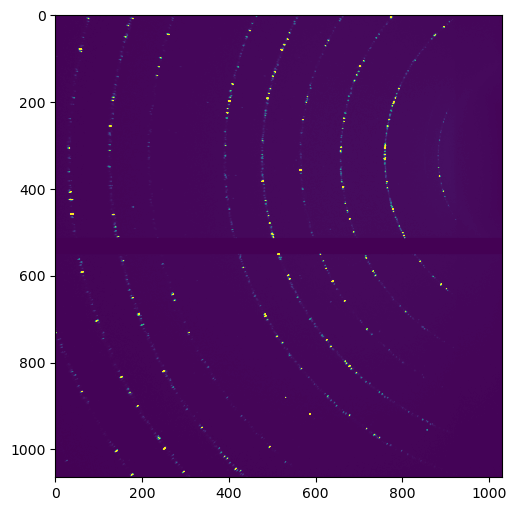

In [3]:
project_dir = '/data/visitors/balder/20220115/2022022408'
experiment_dir = os.path.join(project_dir, 'raw/XRD Eiger Test')
poni_dir = os.path.join(project_dir, 'process')

stacks = {
    "no_tilt_close": {
        "filename": 'LaB6_9_data_000001.h5',
        "poni": 'samuel_9_0.poni'
    },
}

data_layer = 9
saves = {}

for stack_name in stacks.keys():
    stack = stacks[stack_name]
    config, data = utils.load_stack(
        os.path.join(project_dir, experiment_dir, stack["filename"]),
        os.path.join(poni_dir, stack["poni"]),
    )
    img, mask = utils.mask(data[data_layer], False)
    saves[stack_name] = {
        "original_image": img,
    }

img = saves["no_tilt_close"]["original_image"]
perc = np.percentile(img, 99.9)
plt.figure(figsize=(6,6))
plt.imshow(img, vmax=perc, vmin=0)
plt.show()

Find the top module.

Let's hope there at least a single nonzero pixel at each line except the gap.

gap index[0]: 514
gap index size: 37
nb of rows: 1065
test: 2*gap_index[0]+gap_index_size == nb_of_rows: True
module size: 514 x 1030
assuming 2 x 4 ASICs
ASIC size: 256.00 x 256.00


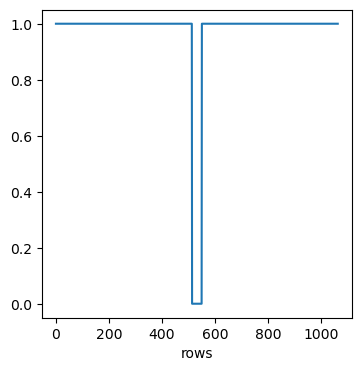

In [4]:
plt.figure(figsize=(4,4))
plt.plot(np.any(img>0,axis=1))
plt.xlabel('rows')

idx_gap = np.argwhere( np.any(img>0,axis=1)==False).flatten()
print('gap index[0]:', idx_gap[0])
print('gap index size:', len(idx_gap))
print('nb of rows:', img.shape[0])
print('test: 2*gap_index[0]+gap_index_size == nb_of_rows:', (2*idx_gap[0]+len(idx_gap))==img.shape[0])

assert((2*idx_gap[0]+len(idx_gap))==img.shape[0])

a_nrows = 2
a_ncols = 4

print('module size: %d x %d' % (idx_gap[0], img.shape[1],))
print('assuming %d x %d ASICs' % (a_nrows, a_ncols,))
print('ASIC size: %.2f x %.2f' % ((idx_gap[0]-2*(a_nrows-1))/a_nrows, (img.shape[1]-2*(a_ncols-1))/a_ncols,)) # 2 virtual pixels between ASICs modules